## 計測したデータをpandasで読み込み、グラフ表示する

In [3]:
import pandas as pd

In [4]:
df =pd.read_csv('20190711_Logginng_yk/Glog001.csv')
df.head()

ax  ay    az  gx  gy  gz   time  flg
0  -1  -1   999   0   0   0  72179    0
1  -3  -1  1004   0   0   0  72255    0
2  -8  -2   997   0   0   0  72297    0
3  -1  -3   997   0   0   0  72340    0
4  -3  -1   996   0   0   0  72382    0

In [5]:
df = df.set_index('time')
df.head()

ax  ay    az  gx  gy  gz  flg
time                                
72179  -1  -1   999   0   0   0    0
72255  -3  -1  1004   0   0   0    0
72297  -8  -2   997   0   0   0    0
72340  -1  -3   997   0   0   0    0
72382  -3  -1   996   0   0   0    0

In [6]:
df.plot();

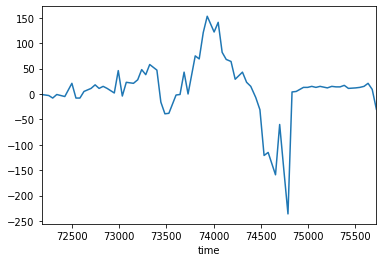

In [7]:
# axのみ表示
df['ax'].plot();

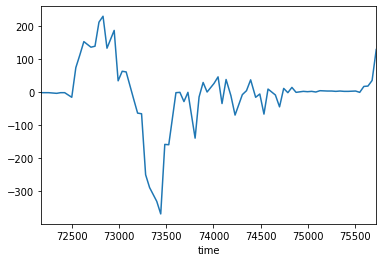

In [8]:
df['ay'].plot();

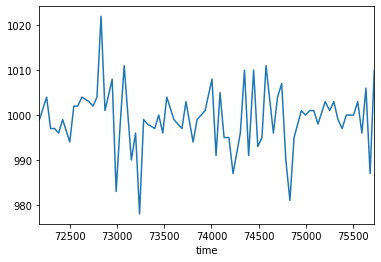

In [9]:
df['az'].plot();

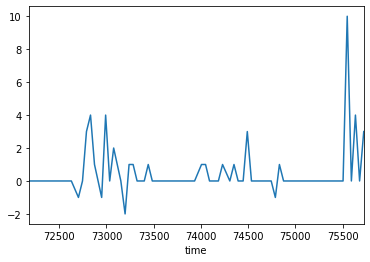

In [10]:
df['gx'].plot();

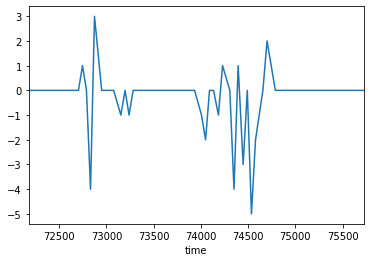

In [11]:
df['gy'].plot();

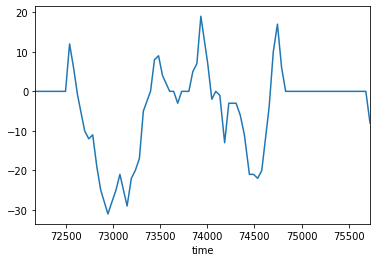

In [12]:
df['gz'].plot();

## k-meansによる異常検知

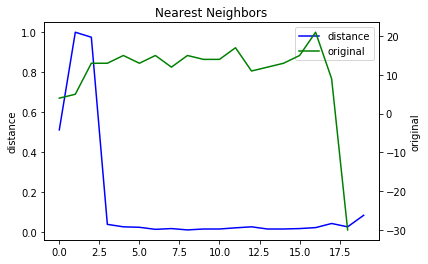

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

train_split = 0.7

train_data = df["ax"].values[0:round(len(df)*train_split)]
test_data = df["ax"].values[round(len(df)*train_split):]


def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) 
        emb = np.append( emb, tmp, axis=0)
    return emb

width = 3
nk = 1

train = embed(train_data, width)
test = embed(test_data, width)

neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]

# 距離をmax1にするデータ整形
mx = np.max(d)
d = d / mx

test_for_plot = df["ax"].values[round(len(df)*train_split)+width:]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

p1, = ax1.plot(d, '-b')
ax1.set_ylabel('distance')
p2, = ax2.plot(test_for_plot, '-g')
ax2.set_ylabel('original')
plt.title("Nearest Neighbors")
ax1.legend([p1, p2], ["distance", "original"])
plt.show()

## 周波数に変換してk-means

In [63]:
import numpy as np
N = 1000 # サンプリング個数

df['ax_fft'] = abs(np.fft.fft(df['ax']) / (N - 2))
df.head()

ax  ay    az  gx  gy  gz  flg    ax_fft
time                                          
72179  -1  -1   999   0   0   0    0  0.638277
72255  -3  -1  1004   0   0   0    0  1.065060
72297  -8  -2   997   0   0   0    0  1.355291
72340  -1  -3   997   0   0   0    0  1.648885
72382  -3  -1   996   0   0   0    0  1.006258

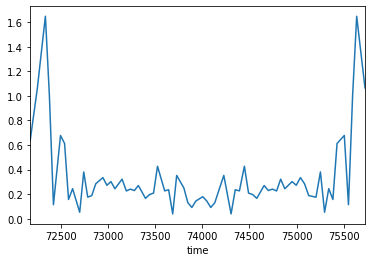

In [64]:
df["ax_fft"].plot()

In [65]:
cols = ["ax", "ay", "ax", "gx", "gy", "gz"]
for col in cols[1:]:
    df["{}_fft".format(col)] = abs(np.fft.fft(df[col]) / (N - 2))

In [66]:
df.head()

ax  ay    az  gx  gy  gz  flg    ax_fft    ay_fft    gx_fft    gy_fft  \
time                                                                           
72179  -1  -1   999   0   0   0    0  0.638277  0.154309  0.037074  0.015030   
72255  -3  -1  1004   0   0   0    0  1.065060  1.943816  0.013272  0.011918   
72297  -8  -2   997   0   0   0    0  1.355291  2.472433  0.005657  0.010420   
72340  -1  -3   997   0   0   0    0  1.648885  2.615693  0.023005  0.011009   
72382  -3  -1   996   0   0   0    0  1.006258  2.005240  0.021073  0.006807   

         gz_fft  
time             
72179  0.304609  
72255  0.175925  
72297  0.277927  
72340  0.295322  
72382  0.055028

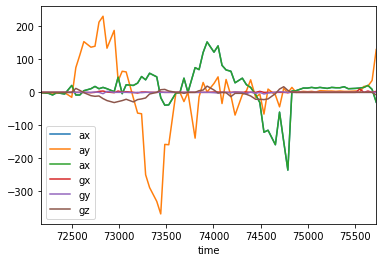

In [67]:
df[cols].plot()

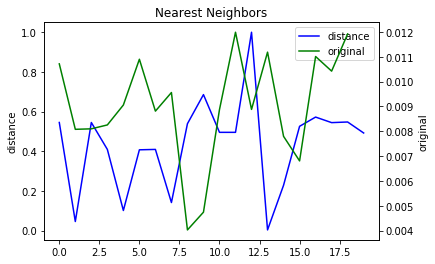

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

train_split = 0.7

train_data = df["gy_fft"].values[0:round(len(df)*train_split)]
test_data = df["gy_fft"].values[round(len(df)*train_split):]


def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        tmp = np.array(lst[i:i+dim])[::-1].reshape((1,-1)) 
        emb = np.append( emb, tmp, axis=0)
    return emb

width = 3
nk = 1

train = embed(train_data, width)
test = embed(test_data, width)

neigh = NearestNeighbors(n_neighbors=nk)
neigh.fit(train)
d = neigh.kneighbors(test)[0]

# 距離をmax1にするデータ整形
mx = np.max(d)
d = d / mx

test_for_plot = df["gy_fft"].values[round(len(df)*train_split)+width:]
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

p1, = ax1.plot(d, '-b')
ax1.set_ylabel('distance')
p2, = ax2.plot(test_for_plot, '-g')
ax2.set_ylabel('original')
plt.title("Nearest Neighbors")
ax1.legend([p1, p2], ["distance", "original"])
plt.show()